In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Initnial EDA

### Read the data

In [2]:
df = pd.read_csv('data.csv', usecols=[*range(0,12)], names=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

In [3]:
df.head()

0   1       2   3   4   5   6   7     8   9   10  11
0  39  A0   77516  B0  13  C0  D0  E0  2174   0  40   0
1  50  A1   83311  B0  13  C1  D0  E0     0   0  13   0
2  38  A2  215646  B1   9  C2  D0  E0     0   0  40   0
3  53  A2  234721  B2   7  C2  D1  E0     0   0  40   0
4  28  A2  338409  B0  13  C3  D1  E1     0   0  40   0

In [4]:
df.shape

(10000, 12)

**The data does not seems to have a header/column row, it is reread with an added column name**

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       10000 non-null  int64 
 1   1       10000 non-null  object
 2   2       10000 non-null  int64 
 3   3       10000 non-null  object
 4   4       10000 non-null  int64 
 5   5       10000 non-null  object
 6   6       10000 non-null  object
 7   7       10000 non-null  object
 8   8       10000 non-null  int64 
 9   9       10000 non-null  int64 
 10  10      10000 non-null  int64 
 11  11      10000 non-null  int64 
dtypes: int64(7), object(5)
memory usage: 937.6+ KB


**There are no null value**

In [6]:
df.describe()

0             2            4             8             9   \
count  10000.000000  1.000000e+04  10000.00000  10000.000000  10000.000000   
mean      38.338300  1.906607e+05     10.12510   1077.261800     89.555300   
std       13.086099  1.053789e+05      2.54411   7344.244588    403.778098   
min       17.000000  1.930200e+04      1.00000      0.000000      0.000000   
25%       28.000000  1.185045e+05      9.00000      0.000000      0.000000   
50%       37.000000  1.794230e+05     10.00000      0.000000      0.000000   
75%       47.000000  2.395390e+05     13.00000      0.000000      0.000000   
max       90.000000  1.226583e+06     16.00000  99999.000000   3004.000000   

                 10            11  
count  10000.000000  10000.000000  
mean      41.067400      0.246100  
std       11.935112      0.430759  
min        1.000000      0.000000  
25%       40.000000      0.000000  
50%       40.000000      0.000000  
75%       45.000000      0.000000  
max       99.000000      1.000000

#### Check unique values in each column
##### All cols

In [7]:
columns = [*range(0,12)]
categorical_columns = [1, 3, 5, 6, 7]
for index, i in enumerate(columns):
    if index in categorical_columns: 
        data_type = 'categorical'
    else : 
        data_type = 'numeric'
    print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 1 	 has 7 unique values, categorical
column 2 	 has 8457 unique values, numeric
column 3 	 has 16 unique values, categorical
column 4 	 has 16 unique values, numeric
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### numeric only

In [8]:
for index, i in enumerate(columns):
    data_type = 'numeric'
    if index not in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))

column 0 	 has 71 unique values, numeric
column 2 	 has 8457 unique values, numeric
column 4 	 has 16 unique values, numeric
column 8 	 has 97 unique values, numeric
column 9 	 has 72 unique values, numeric
column 10 	 has 85 unique values, numeric
column 11 	 has 2 unique values, numeric


##### categorical

In [9]:
col_to_add = 0
for index, i in enumerate(columns):
    data_type = 'categorical'
    if index in categorical_columns: 
        print('column %i \t has %i unique values, %s'%(i,len(df[i].unique()), data_type))
        col_to_add+=len(df[i].unique())
print('col to be added with dummbies', col_to_add)

column 1 	 has 7 unique values, categorical
column 3 	 has 16 unique values, categorical
column 5 	 has 14 unique values, categorical
column 6 	 has 5 unique values, categorical
column 7 	 has 2 unique values, categorical
col to be added with dummbies 44


#### col 11 unique values

In [10]:
df[11].unique()

array([0, 1])

#### Graphs

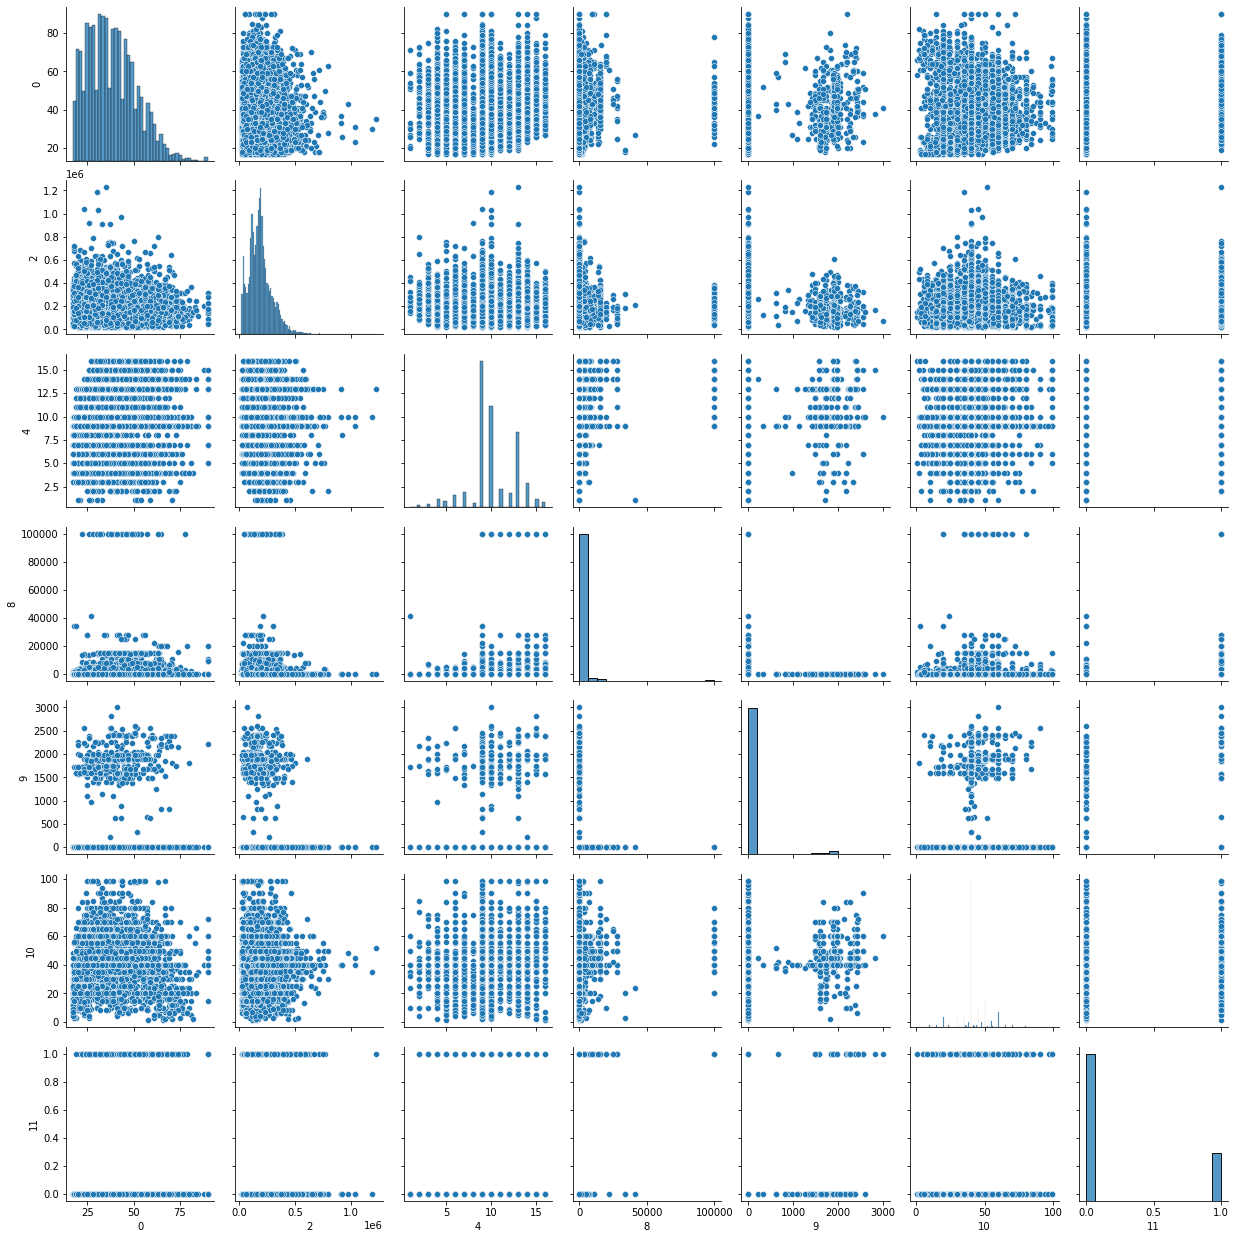

In [11]:
sns.pairplot(df)

<AxesSubplot:>

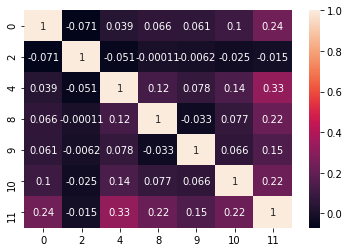

In [12]:
sns.heatmap(df[[0, 2, 4, 8, 9, 10, 11]].corr(), annot = True)

**There are very little correlation between the numeric data and the target column**

#### Check the distribution of the categorical data

1


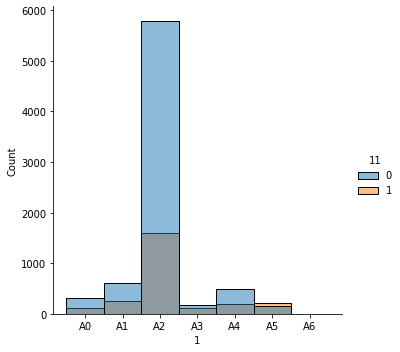

In [13]:
print(1)
sns.displot(df, x=df[1], hue=df[11])

3


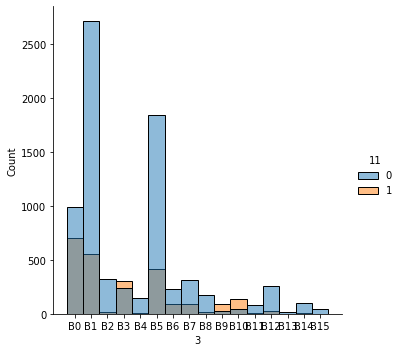

In [14]:
print(3)
sns.displot(df, x=df[3], hue=df[11])

5


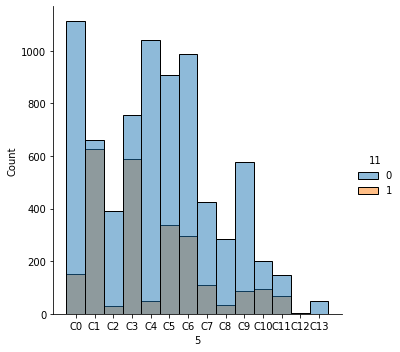

In [15]:
print(5)
sns.displot(df, x=df[5], hue=df[11])

6


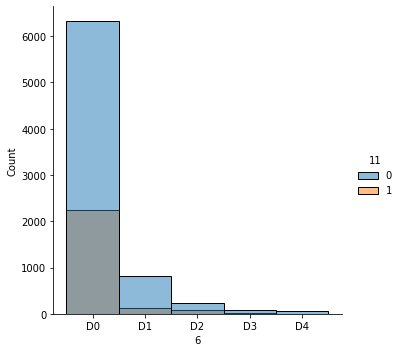

In [16]:
print(6)
sns.displot(df, x=df[6], hue=df[11])

7


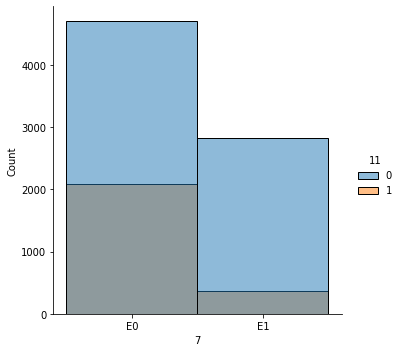

In [17]:
print(7)
sns.displot(df, x=df[7], hue=df[11])

#### Target data distribution

In [65]:
df[11].value_counts()

0    7539
1    2461
Name: 11, dtype: int64

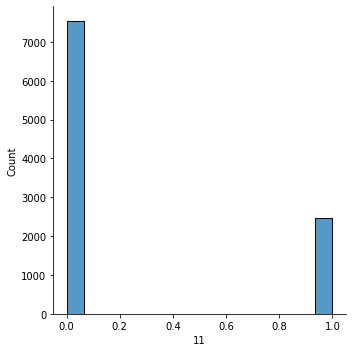

In [18]:
sns.displot(df[11])

### Feature Engineering on the categorical columns
#### Each Unique values get a col

In [19]:
from sklearn.preprocessing import OneHotEncoder

In [20]:
ohe = OneHotEncoder()
feature_arr = ohe.fit_transform(df[[1]]).toarray()
feature_label = [str(1) + "_" + str(i) for i in range(feature_arr.shape[1])]
feature = pd.DataFrame(feature_arr, columns=feature_label)

In [21]:
# if data is categorical, transform them
df_ohe = df.copy()
for index, i in enumerate(columns):
    if index in categorical_columns: 
        ohe = OneHotEncoder()
        feature_arr = ohe.fit_transform(df[[index]]).toarray()
        feature_label = [str(index) + "_" + str(k) for k in range(feature_arr.shape[1])]
        feature = pd.DataFrame(feature_arr, columns=feature_label)
        # drop the last col
        # feature = feature.iloc[:, :-1]
        df_ohe = pd.concat([df_ohe, feature], axis=1)
        df_ohe.drop(index, axis=1, inplace=True)

In [22]:
df_ohe.head()

0       2   4     8  9  10  11  1_0  1_1  1_2  ...  5_11  5_12  5_13  6_0  \
0  39   77516  13  2174  0  40   0  1.0  0.0  0.0  ...   0.0   0.0   0.0  1.0   
1  50   83311  13     0  0  13   0  0.0  1.0  0.0  ...   0.0   0.0   0.0  1.0   
2  38  215646   9     0  0  40   0  0.0  0.0  1.0  ...   0.0   0.0   0.0  1.0   
3  53  234721   7     0  0  40   0  0.0  0.0  1.0  ...   0.0   0.0   0.0  0.0   
4  28  338409  13     0  0  40   0  0.0  0.0  1.0  ...   0.0   0.0   0.0  0.0   

   6_1  6_2  6_3  6_4  7_0  7_1  
0  0.0  0.0  0.0  0.0  1.0  0.0  
1  0.0  0.0  0.0  0.0  1.0  0.0  
2  0.0  0.0  0.0  0.0  1.0  0.0  
3  1.0  0.0  0.0  0.0  1.0  0.0  
4  1.0  0.0  0.0  0.0  0.0  1.0  

[5 rows x 51 columns]

In [23]:
df_ohe.columns

Index([     0,      2,      4,      8,      9,     10,     11,  '1_0',  '1_1',
        '1_2',  '1_3',  '1_4',  '1_5',  '1_6',  '3_0',  '3_1',  '3_2',  '3_3',
        '3_4',  '3_5',  '3_6',  '3_7',  '3_8',  '3_9', '3_10', '3_11', '3_12',
       '3_13', '3_14', '3_15',  '5_0',  '5_1',  '5_2',  '5_3',  '5_4',  '5_5',
        '5_6',  '5_7',  '5_8',  '5_9', '5_10', '5_11', '5_12', '5_13',  '6_0',
        '6_1',  '6_2',  '6_3',  '6_4',  '7_0',  '7_1'],
      dtype='object')

## Train

### Base Model

In [24]:
from sklearn.model_selection import train_test_split

In [86]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values

In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [88]:
from sklearn.preprocessing import MinMaxScaler

In [89]:
scaler = MinMaxScaler()

In [90]:
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [91]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [93]:
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [94]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.5483 - val_loss: 0.4727
Epoch 2/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4929 - val_loss: 0.4490
Epoch 3/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4731 - val_loss: 0.4367
Epoch 4/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4540 - val_loss: 0.4243
Epoch 5/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4512 - val_loss: 0.4172
Epoch 6/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4125
Epoch 7/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4099
Epoch 8/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4342 - val_loss: 0.4059
Epoch 9/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.4008
Epoch 10/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.426

219/219 [==============================] - 0s 1ms/step - loss: 0.3533 - val_loss: 0.3861
Epoch 81/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3544 - val_loss: 0.3883
Epoch 82/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3536 - val_loss: 0.3841
Epoch 83/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3563 - val_loss: 0.3869
Epoch 84/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3532 - val_loss: 0.3861
Epoch 85/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3549 - val_loss: 0.3891
Epoch 86/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3568 - val_loss: 0.3888
Epoch 87/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3549 - val_loss: 0.3868
Epoch 88/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3547 - val_loss: 0.3881
Epoch 89/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.3538 - v

<AxesSubplot:>

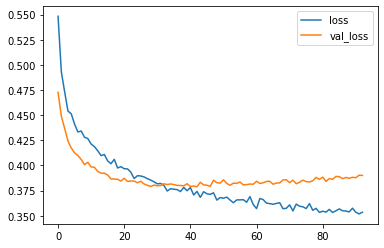

In [95]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [96]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [97]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2097  171]
 [ 353  379]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      2268
           1       0.69      0.52      0.59       732

    accuracy                           0.83      3000
   macro avg       0.77      0.72      0.74      3000
weighted avg       0.82      0.83      0.82      3000

accuracy_score 0.8253333333333334


#### PCA
##### Standarize the data

In [37]:
from sklearn.preprocessing import StandardScaler

In [38]:
scaler = StandardScaler()

In [39]:
# scale without col 11, the target col
scaler.fit(df_ohe.drop([11], axis=1))

StandardScaler()

In [40]:
scaled_data = scaler.transform(df_ohe.drop([11], axis=1))

#### PCA

In [41]:
from sklearn.decomposition import PCA

In [42]:
pca = PCA(n_components=2)

In [43]:
pca.fit(scaled_data)

PCA(n_components=2)

In [44]:
x_pca = pca.transform(scaled_data)

In [45]:
x_pca.shape

(10000, 2)

/home/ubuntu/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

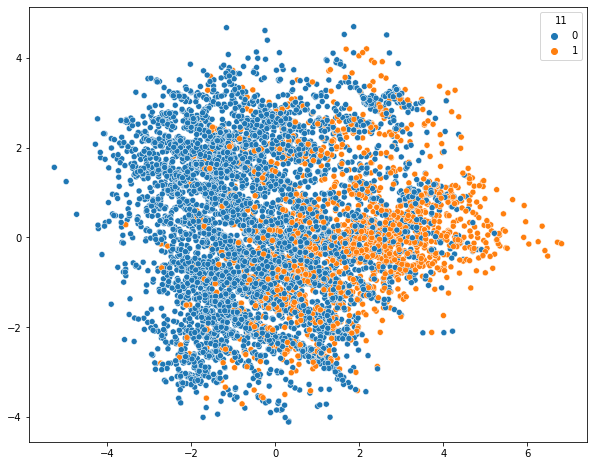

In [46]:
plt.figure(figsize=(10,8))
sns.scatterplot(x_pca[:,0], x_pca[:,1], hue=df[11])

### Split the data

In [71]:
from sklearn.model_selection import train_test_split

In [72]:
X = x_pca
y = df_ohe[11].values

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [74]:
from sklearn.preprocessing import MinMaxScaler

In [75]:
# model
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [76]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)

In [77]:
model = Sequential()
model.add(Dense(units=2, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='adam')

In [78]:
model.fit(x=X_train, y=y_train, epochs=2000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/2000
219/219 [==============================] - 0s 2ms/step - loss: 0.6268 - val_loss: 0.5575
Epoch 2/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5826 - val_loss: 0.5515
Epoch 3/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5711 - val_loss: 0.5496
Epoch 4/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5656 - val_loss: 0.5417
Epoch 5/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5500 - val_loss: 0.5226
Epoch 6/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5465 - val_loss: 0.5098
Epoch 7/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5362 - val_loss: 0.4996
Epoch 8/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5318 - val_loss: 0.4916
Epoch 9/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.5279 - val_loss: 0.4846
Epoch 10/2000
219/219 [==============================] - 0s 1ms/step - loss: 0.525

<AxesSubplot:>

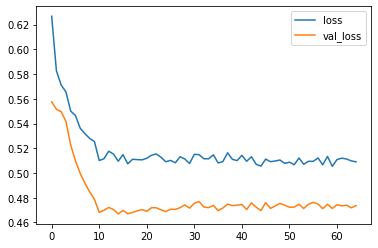

In [79]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

### Predictions

In [56]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [57]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2152  116]
 [ 484  248]]
              precision    recall  f1-score   support

           0       0.82      0.95      0.88      2268
           1       0.68      0.34      0.45       732

    accuracy                           0.80      3000
   macro avg       0.75      0.64      0.67      3000
weighted avg       0.78      0.80      0.77      3000

accuracy_score 0.8


### Different model

In [58]:
from sklearn.model_selection import train_test_split

In [80]:
X = df_ohe.drop(11, axis=1).values
y = df_ohe[11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12)

In [81]:
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [82]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', patience=50, verbose=1)
model = Sequential()
model.add(Dense(units=50, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=25, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1, activation='sigmoid'))
# loss for binary
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [83]:
model.fit(x=X_train, y=y_train, epochs=1000, validation_data=(X_test, y_test), verbose=1,callbacks=early_stop)

Epoch 1/1000
219/219 [==============================] - 0s 2ms/step - loss: 0.6259 - val_loss: 0.5547
Epoch 2/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5795 - val_loss: 0.5399
Epoch 3/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5555 - val_loss: 0.5271
Epoch 4/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5422 - val_loss: 0.5153
Epoch 5/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5075
Epoch 6/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5262 - val_loss: 0.4991
Epoch 7/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5210 - val_loss: 0.4925
Epoch 8/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5175 - val_loss: 0.4870
Epoch 9/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.5103 - val_loss: 0.4825
Epoch 10/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.511

219/219 [==============================] - 0s 1ms/step - loss: 0.4396 - val_loss: 0.4132
Epoch 81/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4400 - val_loss: 0.4133
Epoch 82/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4382 - val_loss: 0.4127
Epoch 83/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4385 - val_loss: 0.4122
Epoch 84/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4389 - val_loss: 0.4126
Epoch 85/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4387 - val_loss: 0.4121
Epoch 86/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4352 - val_loss: 0.4122
Epoch 87/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4338 - val_loss: 0.4108
Epoch 88/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4349 - val_loss: 0.4109
Epoch 89/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4386 - v

219/219 [==============================] - 0s 1ms/step - loss: 0.4182 - val_loss: 0.3972
Epoch 160/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4183 - val_loss: 0.3968
Epoch 161/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4201 - val_loss: 0.3968
Epoch 162/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4213 - val_loss: 0.3962
Epoch 163/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4187 - val_loss: 0.3970
Epoch 164/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4161 - val_loss: 0.3969
Epoch 165/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4101 - val_loss: 0.3960
Epoch 166/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4172 - val_loss: 0.3965
Epoch 167/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3965
Epoch 168/1000
219/219 [==============================] - 0s 1ms/step - loss: 0

Epoch 238/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4101 - val_loss: 0.3900
Epoch 239/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4001 - val_loss: 0.3883
Epoch 240/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4082 - val_loss: 0.3901
Epoch 241/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3992 - val_loss: 0.3883
Epoch 242/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4019 - val_loss: 0.3888
Epoch 243/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4027 - val_loss: 0.3882
Epoch 244/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4022 - val_loss: 0.3883
Epoch 245/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4062 - val_loss: 0.3891
Epoch 246/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.4038 - val_loss: 0.3881
Epoch 247/1000
219/219 [==============================] - 0s 1ms

Epoch 317/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3954 - val_loss: 0.3814
Epoch 318/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3923 - val_loss: 0.3807
Epoch 319/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3918 - val_loss: 0.3810
Epoch 320/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3896 - val_loss: 0.3812
Epoch 321/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3899 - val_loss: 0.3810
Epoch 322/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3951 - val_loss: 0.3815
Epoch 323/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 0.3828
Epoch 324/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3972 - val_loss: 0.3811
Epoch 325/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3875 - val_loss: 0.3804
Epoch 326/1000
219/219 [==============================] - 0s 1ms

Epoch 396/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3844 - val_loss: 0.3767
Epoch 397/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3873 - val_loss: 0.3766
Epoch 398/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3821 - val_loss: 0.3769
Epoch 399/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3807 - val_loss: 0.3776
Epoch 400/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3818 - val_loss: 0.3770
Epoch 401/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3765
Epoch 402/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3855 - val_loss: 0.3781
Epoch 403/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3822 - val_loss: 0.3771
Epoch 404/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3848 - val_loss: 0.3765
Epoch 405/1000
219/219 [==============================] - 0s 1ms

Epoch 475/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3748 - val_loss: 0.3748
Epoch 476/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3732 - val_loss: 0.3731
Epoch 477/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3783 - val_loss: 0.3755
Epoch 478/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3762 - val_loss: 0.3739
Epoch 479/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3725 - val_loss: 0.3743
Epoch 480/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3769 - val_loss: 0.3741
Epoch 481/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3795 - val_loss: 0.3776
Epoch 482/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3770 - val_loss: 0.3761
Epoch 483/1000
219/219 [==============================] - 0s 1ms/step - loss: 0.3777 - val_loss: 0.3755
Epoch 484/1000
219/219 [==============================] - 0s 1ms

<AxesSubplot:>

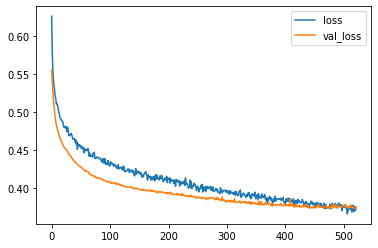

In [84]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [85]:
predictions = model.predict_classes(X_test)
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
print("accuracy_score", accuracy_score(y_test, predictions))

[[2132  136]
 [ 382  350]]
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      2268
           1       0.72      0.48      0.57       732

    accuracy                           0.83      3000
   macro avg       0.78      0.71      0.73      3000
weighted avg       0.82      0.83      0.81      3000

accuracy_score 0.8273333333333334
